# ML Task 1.5 part 2 - Summary Results - DT vs ANN models

## Table of Contents

#### 01. Import libraries and datasets

#### 02. Summary results: Decision Tree (DT) versus Artificial Neural Network (ANN)

#### 02.01 Baseline

#### 02.02 Core performance scores

#### 02.03 Class-specific scores (Test)

#### 02.04 Confusion matrix summary (Test)

#### 02.05 Learning curve insights

#### 02.06 Class-specific scores (Train)

#### 02.07 Confusion matrix summary (Train)

#### 02.08 Decision Tree metadata (Appendix)

#### 02.09 ANN metadata (Appendix)

### 01. Import libraries and datasets

In [22]:
import pandas as pd
import numpy as np
import seaborn as sns
import os
import matplotlib.pyplot as plt

In [24]:
# Create path to dataset location
path = r'C:\Users\dirk8\CareerFoundry\07-2025 Machine Learning With Python\Datasets'

In [194]:
# Import datasets
baseline = pd.read_excel(os.path.join(path, 'DT & ANN Results - Summary.xlsx'), sheet_name='Baseline', index_col=0)
core_performance_scores = pd.read_excel(os.path.join(path, 'DT & ANN Results - Summary.xlsx'), sheet_name='Core Performance Scores', index_col=0)
class_specific_scores_test = pd.read_excel(os.path.join(path, 'DT & ANN Results - Summary.xlsx'), sheet_name='Class-Specific Scores (Test)', index_col=0)
confusion_matrix_summary_test = pd.read_excel(os.path.join(path, 'DT & ANN Results - Summary.xlsx'), sheet_name='Confusion Matrix Summary (Test)', index_col=0)
learning_curve_insights = pd.read_excel(os.path.join(path, 'DT & ANN Results - Summary.xlsx'), sheet_name='Learning Curve Insights', index_col=0)
class_specific_scores_train = pd.read_excel(os.path.join(path, 'DT & ANN Results - Summary.xlsx'), sheet_name='Class-Specific Scores (Train)', index_col=0)
confusion_matrix_summary_train = pd.read_excel(os.path.join(path, 'DT & ANN Results - Summary.xlsx'), sheet_name='Confusion Matrix Summary- Train', index_col=0)
decision_tree_metadata = pd.read_excel(os.path.join(path, 'DT & ANN Results - Summary.xlsx'), sheet_name='DT MetaData', index_col=0)
ann_metadata = pd.read_excel(os.path.join(path, 'DT & ANN Results - Summary.xlsx'), sheet_name='ANN MetaData', index_col=0)

### 02. Summary results: Decision Tree (DT) versus Artificial Neural Network (ANN)

#### Each section that follows presents a screenshot of the relevant Excel table summarizing results from the DT and ANN model work in the previous Tasks 1.5 part 2.  The dataframes from the imported Excel sheets here present the same tables (but with more decimals for some of the numeric data).

### 02.01 Baseline

#### Baseline gives us the Euro climate answers dataset's proportion of days (over the 60+ year temporal period) for each weather station that was "Unpleasant" (boolean value of 0) or "Pleasant" (boolean value of 1).  The classification exercise using the DT and ANN models was for a binary outcome each day, per weather station. The fact that we have an imbalanced class (group mean 74.92% Unpleasant, 25.08% Pleasant days) required some adjustments to the models and their evaluation metrics to avoid distortions that would otherwise arise from the majority class (Unpleasant) dominating model learning on the training dataset.  The table also confirms that the same class proportions were used by each model for each station. On the model evaluation front, baselines are used as a reference level for comparison with metrics like "Balanced Accuracy", to calculate "Lift".  Lift measures how the model performs on a classification exercise versus the expected outcome from just randomly selecting from the overall population -- the baseline.

In [66]:
baseline.shape

(32, 4)

In [70]:
baseline.head(4)

,Weather Station,Model,Unpleasant (0) %,Pleasant (1) %
Index,,,,
0,Basel,DT,75.3192,24.6808
1,Basel,ANN,75.3192,24.6808
2,Oslo,DT,84.4045,15.5955
3,Oslo,ANN,84.4045,15.5955


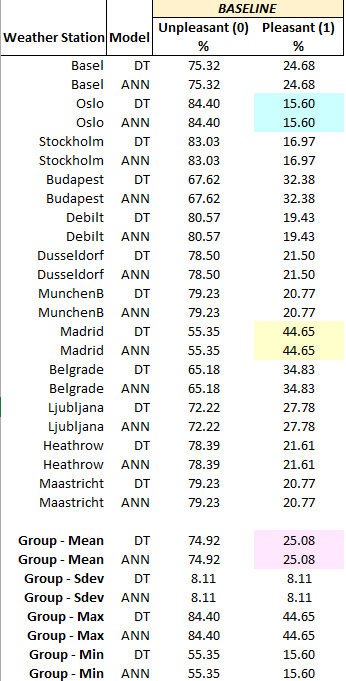

### 02.02 Core performance scores

In [80]:
core_performance_scores.shape

(32, 7)

In [82]:
core_performance_scores.head(4)

,Weather Station,Model,Overall Accuracy (Train) %,Overall Accuracy (Test) %,Balanced Accuracy (Train) %,Balanced Accuracy (Test) %,Lift (Balanced Accuracy) %
Index,,,,,,,
0,Basel,DT,66.74,64.20,68.24,65.03,15.03
1,Basel,ANN,78.14,77.57,69.63,68.37,18.37
2,Oslo,DT,60.43,57.79,68.72,63.69,13.69
3,Oslo,ANN,84.91,84.16,56.59,55.72,5.72


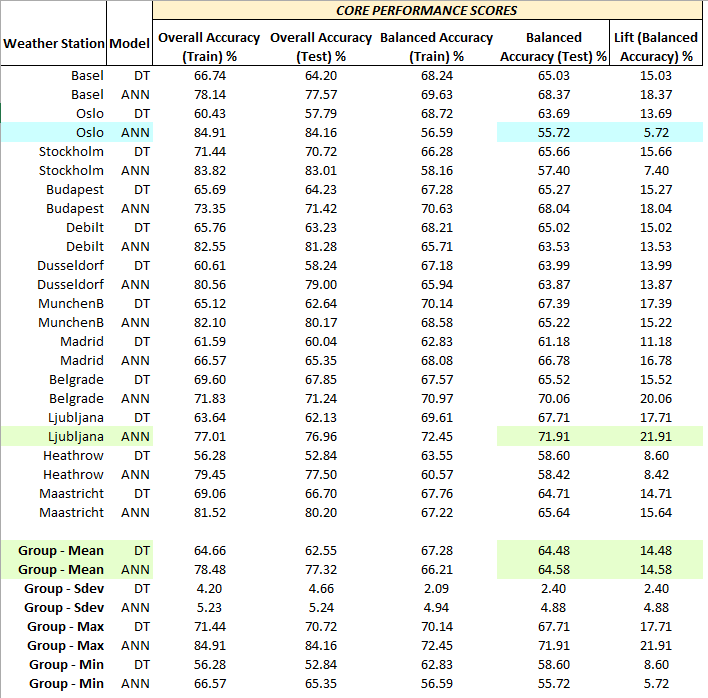

#### Both models had a large range of Balanced Accuracy scores (a measure which adjusts for an imbalanced class, the key characteristic of our answers dataset, presenting a more reliable picture of model performance rather than the Overall Accuracy score, which otherwise overstates accuracy when using an imbalanced class dataset). Balanced Accuracy calculates average Recall (see next table for definition of Recall) for each class, providing a more balanced view of performance on both Pleasant and Unpleasant days, irrespective of their frequency. It's the average of Recall (Sensitivity) for Pleasant and Specificity for Unpleasant days.

#### The ANN model predicted well on the test dataset for Ljubljana weather station, but less so for Oslo, further north.  Meanwhile, both models had similar mean Balanced Accuracy scores and Lift on the test dataset group of weather stations. However, the tables that follow will show why ANN outperformed DT with higher scores on a number of evaluation metrics that present a more balanced view of predictive accuracy, if classification of both classes (Unpleasant, Pleasant), rather than emphasizing predictive accuracy for only one class, is deemed important.

### 02.03 Class-specific scores (Test)

In [94]:
class_specific_scores_test.shape

(32, 11)

In [96]:
class_specific_scores_test.head(4)

,Weather Station,Model,Recall (Pleasant) Test %,Lift (Recall) %,Precision (Pleasant) Test %,Gap (Recall-Precision) %,Specificity (Unpleasant) Test %,Precision (Unpleasant) Test %,Gap (Recall-Precision) %.1,Balanced Accuracy (Test) %,F1 Score (Pleasant) Test %
Index,,,,,,,,,,,
0,Basel,DT,66.69,42.0092,37.85,28.84,63.37,85.05,-21.68,65.03,48.29
1,Basel,ANN,49.93,25.2492,55.88,-5.95,86.81,83.83,2.98,68.37,52.74
2,Oslo,DT,72.34,56.7445,23.29,49.05,55.04,91.34,-36.30,63.69,35.24
3,Oslo,ANN,14.05,-1.5455,50.39,-36.34,97.39,85.72,11.67,55.72,21.97


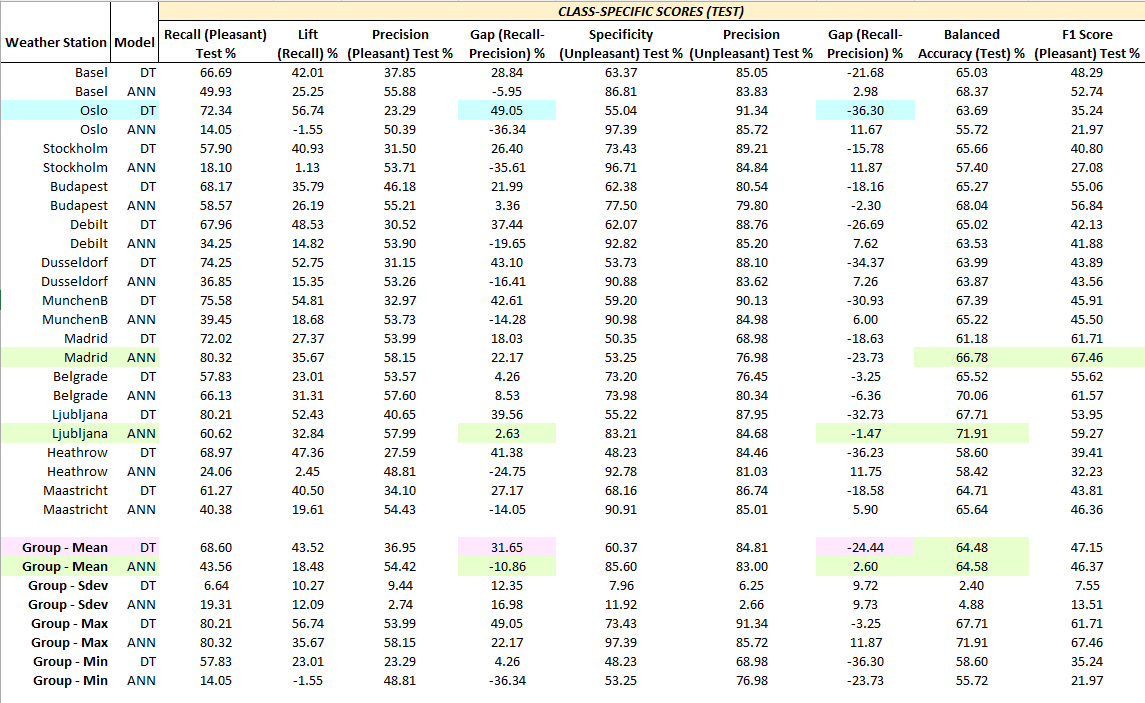

#### Recall (Sensitivity or True Positive Rate) on Pleasant (Positive Class, "1") is the proportion of *actual Pleasant days* that the model *correctly predicted* as Pleasant. A high Recall indicates the model is good at finding most of the actual Pleasant days. Precision on Pleasant (Positive Class, "1") is the proportion of days that the model *predicted as Pleasant* that were *actually Pleasant*. A high Precision means that when the model predicts a day will be Pleasant, it's typically correct. Specificity (True Negative Rate) on Unpleasant (Negative Class, "0") is the proportion of *actual Unpleasant days* that the model *correctly predicted as Unpleasant*. This represents the model's ability to avoid incorrectly classifying Unpleasant days as Pleasant.  Finally, Precision on Unpleasant (Negative Class, "0") is the proportion of days that the model *predicted as Unpleasant* that were *actually Unpleasant*. This evaluates how accurate the model is when it predicts Unpleasant days.

#### F1 Score (weighted) considers the class imbalance by giving more weight to the minority class (Pleasant days, in our case) while balancing Recall and Precision for both classes. It's useful when trying to find a balance between Recall and Precision, at least in scenarios where there is no clear tradeoff preference.

#### Lift (Recall on Pleasant) measures how well (or not) the model did correctly predicting actual Pleasant days, over the baseline proportion of Pleasant days in the dataset. It might be thought of as the model's "value-added" on that particular metric, versus the alternative of not predicting the outcome.

#### Gap in this table measures the differential between Recall and Precision scores. Among the model fine-tuning and regularization (for ANN in particular) goals was to try to minimize Gap as much as possible. This approach assumes that we are not emphasizing predictive accuracy of a particular class over the other class, e.g. not looking to "sacrifice" performance for one class to enable higher predictive accuracy for the other class.

#### This table (above) is where the ANN model performance "pulls away" from the DT model, when reducing the Gap between Recall and Precision accuracy scores is among the "balanced performance" goals we set for the model. ANN achieves that Gap minimization (as determined by the absolute value of the Gap, the positive or negative sign does not matter) for both classes, Pleasant and Unpleasant, compared to the DT model.  Ljubljana weather station is a prime example.

### 02.04 Confusion matrix summary (Test)

In [114]:
confusion_matrix_summary_test.shape

(32, 6)

In [116]:
confusion_matrix_summary_test.head(4)

,Weather Station,Model,TP (Test),FP (Test),TN (Test),FN (Test)
Index,,,,,,
0,Basel,DT,959.0,1575.0,2725.0,479.0
1,Basel,ANN,718.0,567.0,3733.0,720.0
2,Oslo,DT,659.0,2170.0,2657.0,252.0
3,Oslo,ANN,128.0,126.0,4701.0,783.0


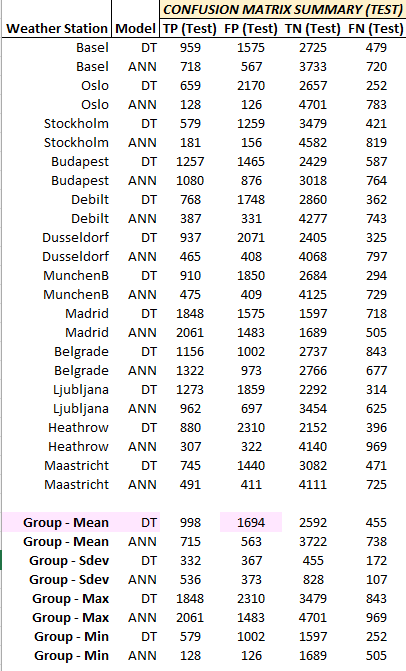

#### TP = True Positives, TN = True Negatives, FP = False Positives, FN = False Negatives.

#### The DT (Decision Tree) model had a high incidence of False Positives (group mean) on the Test dataset, proportionally speaking.  This means it was good at predicting Pleasant days that actually turned out to be Unpleasant.  In the prior "Class-specific scores (Test)" table, we see that DT "sacrificed" Precision on Pleasant (only 37% accuracy) to achieve a higher Recall on Pleasant (68+% accuracy) score.

### 02.05 Learning curve insights

In [125]:
learning_curve_insights.shape

(32, 7)

In [127]:
learning_curve_insights.head(4)

,Weather Station,Model,Final Train Score %,Final Validation Score %,Gap %,Curve Shape,Plateau Reached?
Index,,,,,,,
0,Basel,DT,69.0,65.0,4.0,Converge then moderate gap-parallel,Y
1,Basel,ANN,68.8,67.3,1.5,"Rising curve tapers, small gap - parallel",Y
2,Oslo,DT,67.8,63.0,4.8,Converge then moderate gap-parallel,Y
3,Oslo,ANN,69.0,67.6,1.4,"Rising curve tapers, small gap - parallel",Y


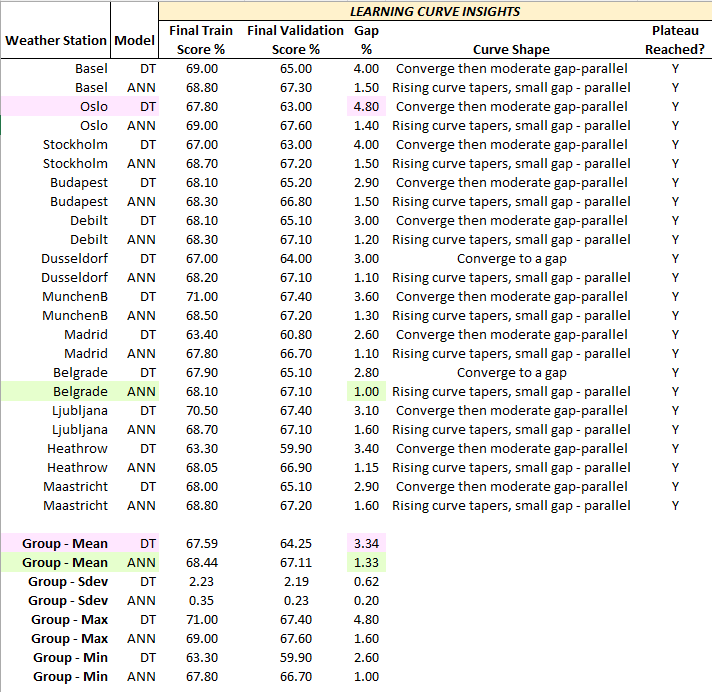

#### The table (above) and learning curves plot (below) reveal the outcomes of the DT and ANN model fine-tuning and regularization efforts (especially for ANN) to minimize model overfitting on the Train dataset, which would hurt its ability to generalize (predict well) on the Test dataset. 

#### Minimization involves reducing the Gap % between the Train and Test (Validation) curves as much as possible.  Again, the ANN outperforms DT on model overfit minimization (above), with a group mean of 1.33% versus 3.34%, respectively.  Achieving this model comparative result was challenging, as ANN is classically prone to overfitting, according to the literature in ML circles.  Beyond model fine-turning and regularization steps taken, originally we 2-step transformed the original raw data for the temperature features, by first differencing the time series data and then z-score standardizing (rescaling) it, creating stationarized numerical data as model inputs (because the ANN model is, or can be, adversely sensitive to non-stationary data series).

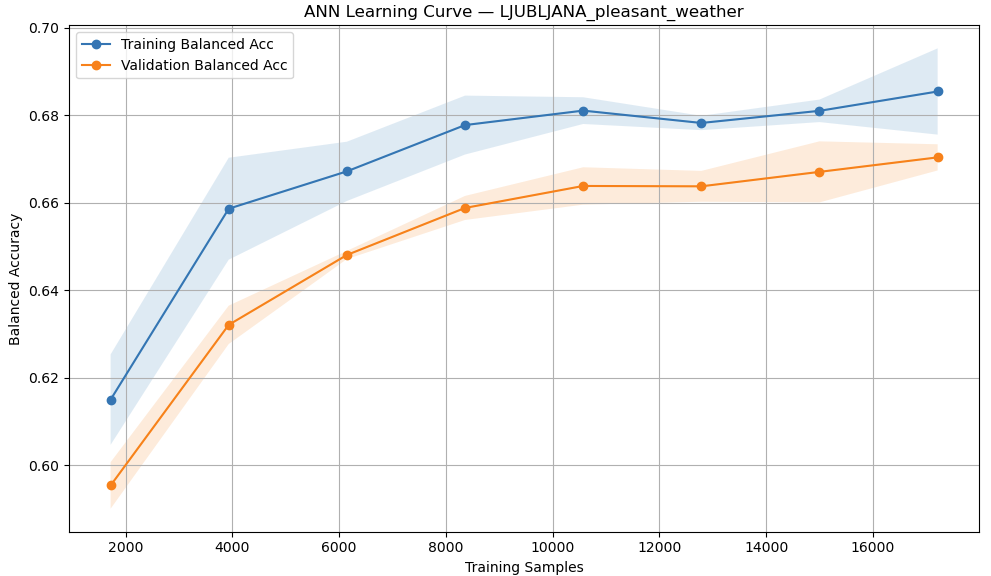

#### 02.06 Class-specific scores (Train)

In [138]:
class_specific_scores_train.shape

(32, 7)

In [140]:
class_specific_scores_train.head(4)

,Weather Station,Model,Recall (Pleasant) Train %,Precision (Pleasant) Train %,Specificity (Unpleasant) Train %,Balanced Accuracy (Train) %,F1 Score (Pleasant) Train %
Index,,,,,,,
0,Basel,DT,71.20,40.03,65.28,68.24,51.25
1,Basel,ANN,52.91,55.79,86.35,69.63,54.31
2,Oslo,DT,80.73,25.49,56.70,68.72,38.74
3,Oslo,ANN,15.55,54.68,97.63,56.59,24.22


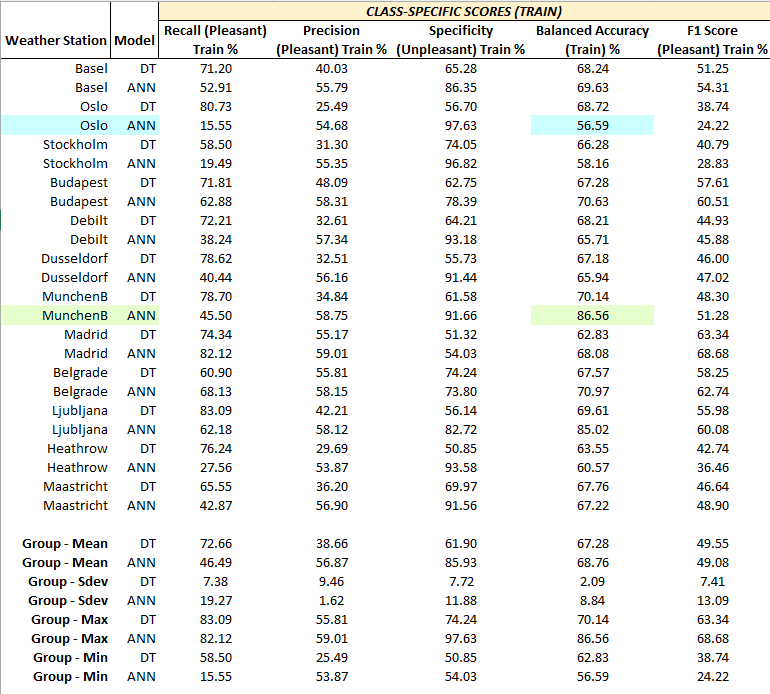

#### We see that the wide range of Balanced Accuracy scores revealed for the Test dataset (table in section 02.03 above) -- for both models -- is reflective of the similarly-wide range for the Train dataset (table above).

### 02.07 Confusion matrix summary (Train)

In [146]:
confusion_matrix_summary_train.shape

(32, 6)

In [148]:
confusion_matrix_summary_train.head(4)

,Weather Station,Model,TP (Train),FP (Train),TN (Train),FN (Train)
Index,,,,,,
0,Basel,DT,3009.0,4508.0,8477.0,1217.0
1,Basel,ANN,2236.0,1772.0,11213.0,1990.0
2,Oslo,DT,2154.0,6297.0,8246.0,514.0
3,Oslo,ANN,415.0,344.0,14199.0,2253.0


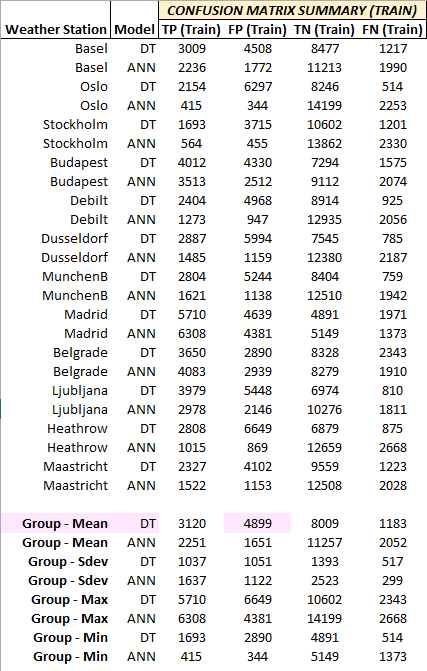

#### As expected based on the Test confusion matrix results, False Positives were the "Achilles Heel" of the DT model for the Train dataset.

### 02.08 Decision tree metadata (Appendix)

In [180]:
decision_tree_metadata.shape

(16, 8)

In [196]:
decision_tree_metadata.head(4)

,Weather Station,Criterion,Max Depth,Min Samples Split,Min Samples Leaf,Class Weight,Pleasant % (Train Set),Random State
Index,,,,,,,,
0,Basel,entropy,7.0,2.0,20.0,balanced,24.6,42.0
1,Oslo,entropy,7.0,2.0,20.0,balanced,15.5,42.0
2,Stockholm,entropy,7.0,2.0,20.0,balanced,16.8,42.0
3,Budapest,entropy,7.0,2.0,20.0,balanced,32.5,42.0


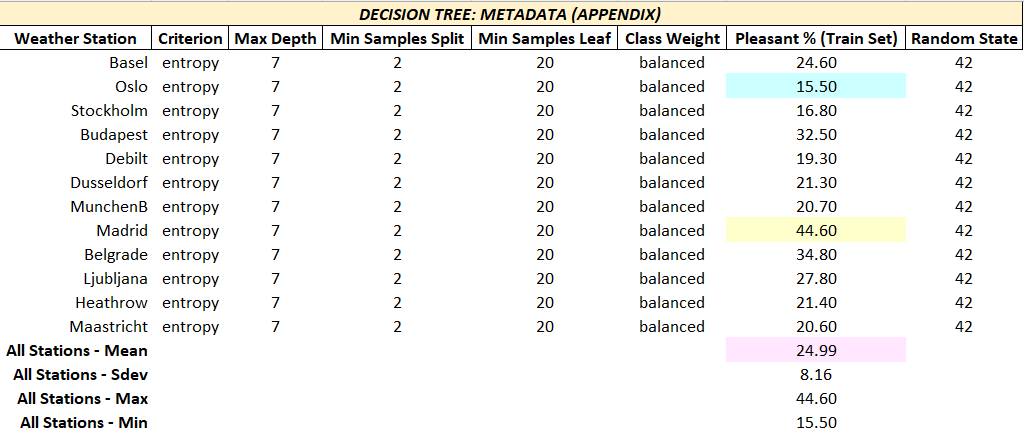

### 02.09 ANN metadata (Appendix)

In [164]:
ann_metadata.shape

(16, 15)

In [198]:
ann_metadata.head(4)

,Weather Station,Library,API,hidden_units,dropout,l2_alpha,lr (learning rate),algorithm,activation,loss,epochs,validation_split,batch_size,Pleasant % (Train Set),Random State
Index,,,,,,,,,,,,,,,
0,Basel,tensorflow,keras,"(40,)",0.1,0.001,0.001,Adam,relu,binary_crossentropy,300.0,0.1,256.0,24.6,42.0
1,Oslo,tensorflow,keras,"(40,)",0.1,0.001,0.001,Adam,relu,binary_crossentropy,300.0,0.1,256.0,15.5,42.0
2,Stockholm,tensorflow,keras,"(40,)",0.1,0.001,0.001,Adam,relu,binary_crossentropy,300.0,0.1,256.0,16.8,42.0
3,Budapest,tensorflow,keras,"(40,)",0.1,0.001,0.001,Adam,relu,binary_crossentropy,300.0,0.1,256.0,32.5,42.0


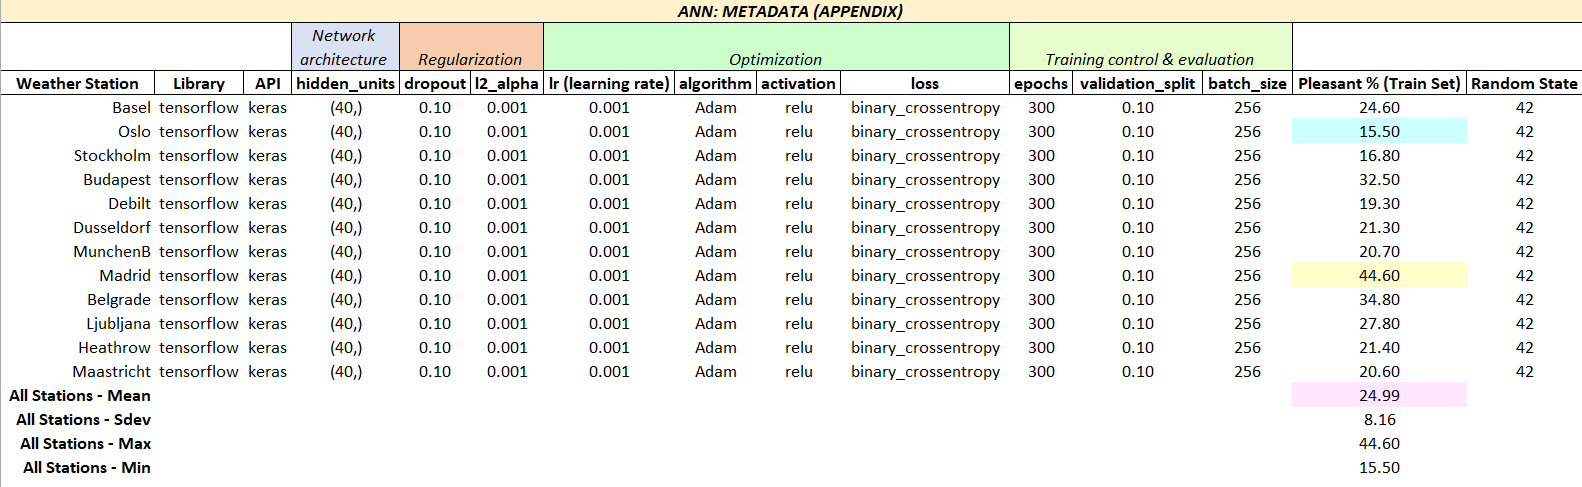

#### Comment: Ljubljana weather station had the best overall balanced result for the ANN model, as below. This was interesting, because it was "near the middle" (at 27.80%) of the group of weather stations in terms of the baseline % of days that were Pleasant over the 60+ year period studied.

#### Scores (below) in decimals, not percentages. Matrix numbers are counts of days.

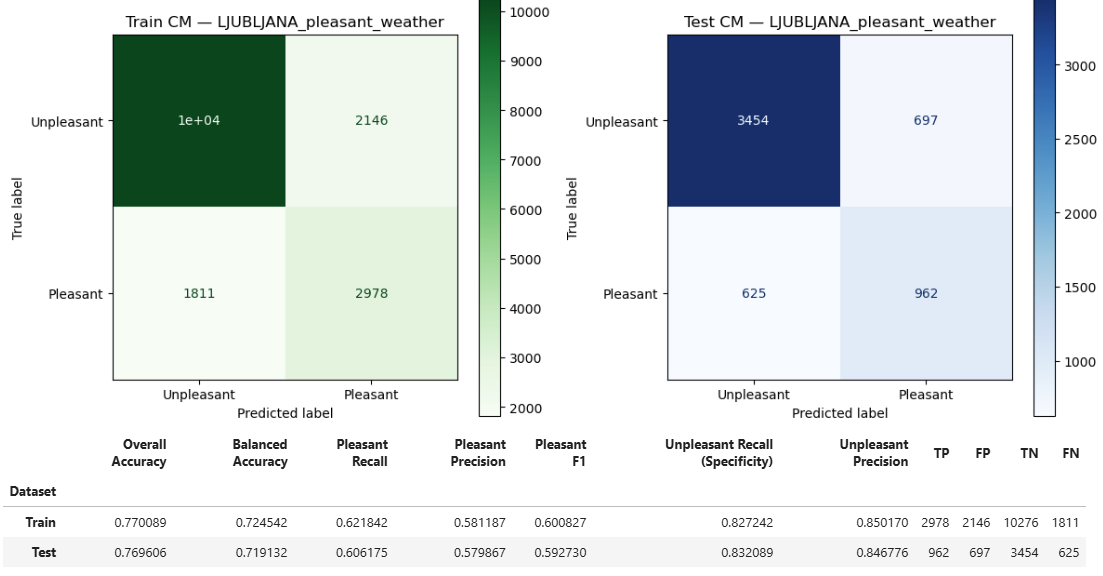